## Data load 

In [ ]:
import numpy as np

In [ ]:
index_inputs = np.load(open('./train_inputs.npy', 'rb'))
index_outputs = np.load(open('./train_outputs.npy', 'rb'))
index_targets = np.load(open('./train_targets.npy', 'rb'))
type(index_inputs)

numpy.ndarray

In [ ]:
index_inputs[3:5]

array([[ 20,  30, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 93,   7,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 448 kB 57.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# preprocess.py 파일 로드
import preprocess as pp

In [ ]:
prepro_configs = pp.json.load(open('./data_configs.json', 'r'))
type(prepro_configs)

dict

In [ ]:
prepro_configs.keys()

dict_keys(['char2idx', 'idx2char', 'vocab_size', 'pad_symbol', 'std_symbol', 'end_symbol', 'unk_symbol'])

## Make model
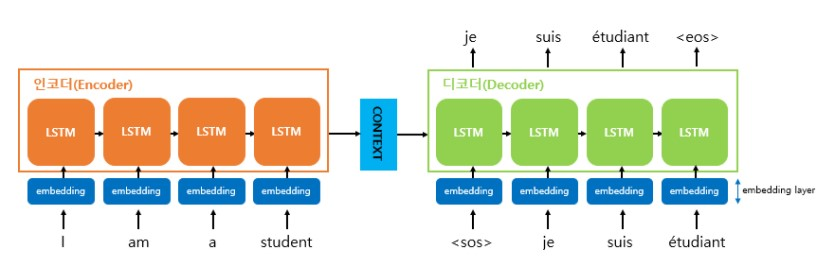
```
Encoder -> context -> Decoder
input                 input
Embedding             Embedding
LSTM                  LSTM
```

In [ ]:
import tensorflow as tf

### encode model

In [ ]:
vocab_size = prepro_configs['vocab_size']
latent_dim = 60

In [ ]:
encode_input = tf.keras.Input(shape=(None, ))
encode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(encode_input)
encode_output, state_h, state_c = tf.keras.layers.LSTM(50, return_state=True)(encode_hidden)
encode_states = [state_h, state_c]

# return_state=True 해주면 parameter(자기 상태 값)가 3개 날라옴.

### decode model

In [ ]:
decode_input = tf.keras.Input(shape=(None,))
decode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(decode_input)
decode_lstm, _, _ = tf.keras.layers.LSTM(50, return_state=True, return_sequences=True)(decode_hidden, initial_state=encode_states)
decode_output = tf.keras.layers.Dense(vocab_size, activation='softmax')(decode_lstm)

In [ ]:
model = tf.keras.models.Model(inputs=[encode_input, decode_input] , outputs=decode_output )

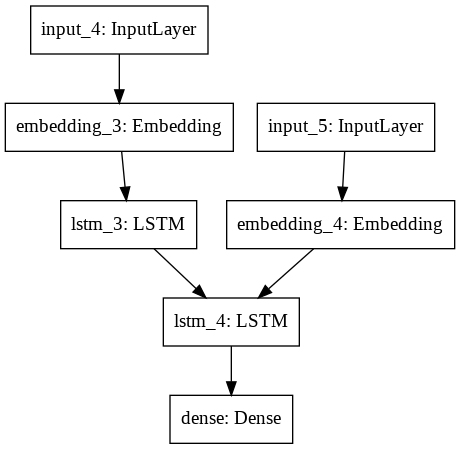

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## fit

In [ ]:
model.fit(x=[index_inputs, index_outputs], y=index_targets, batch_size=128, epochs=50)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 4.7080 - acc: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 4.6927 - acc: 0.0240
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 4.6770 - acc: 0.8220
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 4.6605 - acc: 0.8180
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 4.6428 - acc: 0.8180
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 4.6233 - acc: 0.8180
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 4.6016 - acc: 0.8180
Epoch 8/50
1/1 [==============================] - 0s 35ms/step - loss: 4.5768 - acc: 0.8180
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 4.5481 - acc: 0.8180
Epoch 10/50
1/1 [==============================] - 0s 40ms/step - loss: 4.5143 - acc: 0.8180
Epoch 11/50
1/1 [==============================] - 0s 41ms/step - loss: 4.474

reference : https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/blob/master/6.CHATBOT/6.4.seq2seq.ipynb